# Interpolación de datos COVID-19

**Fuente: EU Open Data Portal**, https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd 

Para ejecutar el código Python, debe descargarse del enlace anterior el fichero correspondiente a la última serie de datos de coronavirus en el mundo. Se trata de un fichero excel (xls) llamado COVID-19-geographic-disbtribution-worldwide-AÑO-MES-DÍA.xls.

Aquí asumimos que este fichero se ha renombrado como "`covid-19.xls`"

In [2]:
data = pd.read_excel("covid-19.xls") 
data.head()

,DateRep,CountryExp,NewConfCases,NewDeaths,GeoId,Gaul1Nuts1,EU
0,2020-03-16,Afghanistan,6,0.0,AF,NaN,Non-EU/EEA
1,2020-03-15,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
2,2020-03-11,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
3,2020-03-08,Afghanistan,3,0.0,AF,NaN,Non-EU/EEA
4,2020-03-02,Afghanistan,0,0.0,AF,NaN,Non-EU/EEA


In [3]:
es_filter = data["CountryExp"]=="Spain"
es_data = data[es_filter]
it_data = data[ data["CountryExp"]=="Italy" ]

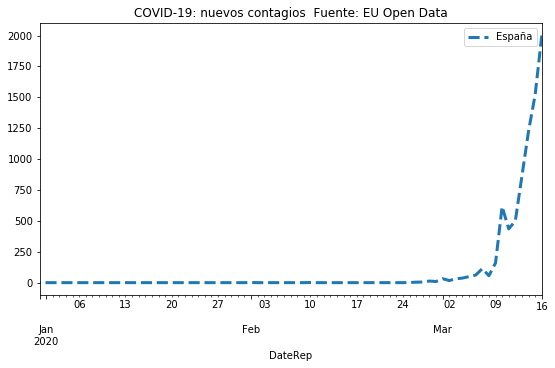

In [4]:
plt.rcParams['figure.figsize'] = (9.0, 5.0)
es_data.plot(x="DateRep", y="NewConfCases", linestyle="--", lw=3, label="España", title="COVID-19: nuevos contagios  Fuente: EU Open Data")

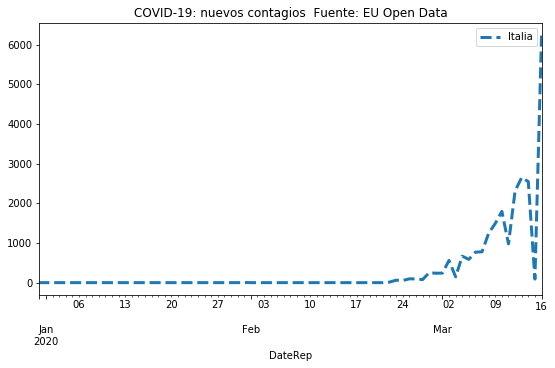

In [5]:
it_data.plot(x="DateRep", y="NewConfCases", linestyle="--", lw=3, label="Italia",
             title="COVID-19: nuevos contagios  Fuente: EU Open Data")

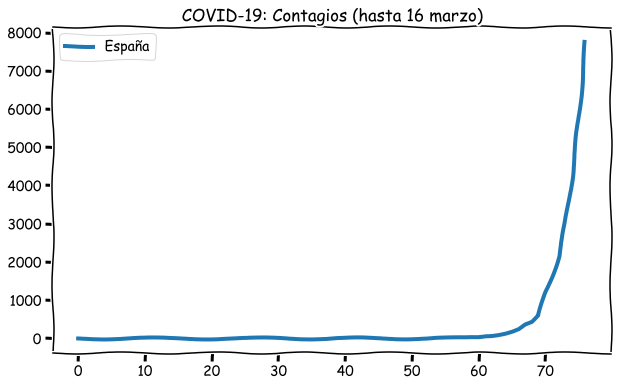

In [6]:
contag = np.array(es_data.loc[:,"NewConfCases"][::-1]).cumsum()


with plt.xkcd():
    plt.rcParams['figure.figsize'] = (10.0, 6.0)
    plt.title("COVID-19: Contagios (hasta 16 marzo)")
    plt.plot(contag,  '-', label="España", lw=4)
    plt.legend()
    plt.grid()
pass

#len(contag)
#n=76 (x_0,x_1,...,x_{76})
#El pol. de interpol tendría grado $n+1=77$

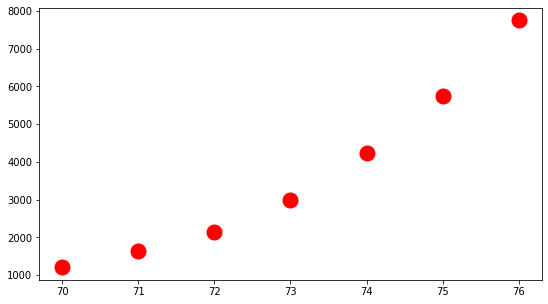

In [7]:
n0 = 70
y = contag[n0:]
x = np.arange(n0, n0+len(y))
plt.plot(x, y, 'o', c="red", markersize=15)

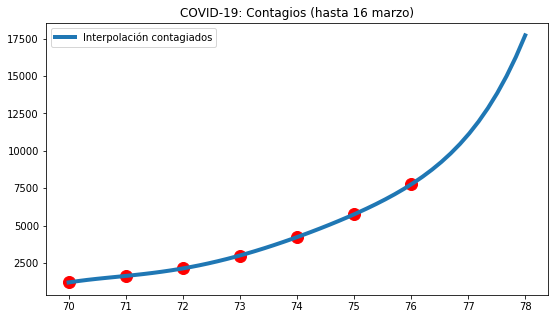

In [10]:
from scipy.interpolate import lagrange
p = lagrange(x, y)

a, b = n0, n0+len(x)+1
xx = np.linspace(a, b)

plt.plot(x, y, 'o', c="red", markersize=12)
plt.title("COVID-19: Contagios (hasta 16 marzo)")
plt.plot(xx, p(xx), lw=4, label="Interpolación contagiados")
plt.legend()
plt.show()